In [175]:
import urllib.request
from bs4 import BeautifulSoup
import os, sys
import hashlib
import numpy as np 
from PIL import Image
from file_reader import *
import matplotlib.pyplot as plt
import pandas as pd

class calc(object):
    def __init__(self, dirname = None):
        self.dirName   = dirname
        self.meta      = None
        self.numShots  = None
        self.readMeta()
        
    def readMeta(self):
        self.meta      = readMdata(self.dirName)
        self.numShots  = len(self.meta)


In [290]:
obj = calc('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood')


C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood
['20191221_131050.jpeg', '20191221_131052.jpeg', '20191221_131132.jpeg', '20191221_131134.jpeg', '20191221_131137.jpeg', '20191221_131139.jpeg', '20191221_131142.jpeg', '20191221_131144.jpeg', '20191221_131147.jpeg', '20191221_131149.jpeg', '20191221_131152.jpeg', '20191221_131154.jpeg', '20191221_131157.jpeg', '20191221_131159.jpeg', '20191221_131202.jpeg', '20191221_131204.jpeg', '20191221_131207.jpeg', '20191221_131209.jpeg', '20191221_131212.jpeg', '20191221_131214.jpeg', '20191221_131217.jpeg', '20191221_131219.jpeg', '20191221_131222.jpeg', '20191221_131224.jpeg', '20191221_131227.jpeg', '20191221_131229.jpeg', '20191221_131232.jpeg', '20191221_131234.jpeg', '20191221_131237.jpeg', '20191221_131239.jpeg', '20191221_131242.jpeg', '20191221_131244.jpeg', '20191221_131247.jpeg', '20191221_131249.jpeg', '20191221_131252.jpeg', '20191221_131254.jpeg', '20191221_131257.jpeg', '20191221_131259.jpeg', '20191221_131305.jpeg', '

In [21]:
obj.meta[0].id

'20191221_131050'

In [34]:
for i in range(obj.numShots):
    i =39
    fpart =obj.dirName + '/raw_BMPs/' + obj.meta[i].id + '_'
    print(fpart)
    for ii in range(5):
        try:
            fname = fpart + str(ii) + '.bmp'
            im = Image.open(fname)
            print(fname)
            file1 = np.array(im)
        except:
            pass
    break

C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131307_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131307_0.bmp
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131307_1.bmp
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131307_2.bmp
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131307_3.bmp


In [218]:
x0 = np.array(Image.open('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131137_0.bmp'))
x1 = np.array(Image.open('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131137_1.bmp'))
x2 = np.array(Image.open('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131137_2.bmp'))
x3 = np.array(Image.open('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131137_3.bmp'))
x4 = np.array(Image.open('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131137_4.bmp'))

x0 = np.flip(x0, 1)
x1 = np.flip(x1, 1)
x2 = np.flip(x2, 1)
x3 = np.flip(x3, 1)
x4 = np.flip(x4, 1)
x.shape

csv = pd.read_csv('C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/20191221_131137_crop.csv')
csvGray = np.array(csv['GRAY'])
csvLEAF = np.array(csv['LEAF'])

In [219]:
zones5 = (238,252,266,280,294,307)

def dataFromBMP5(img, zones): #zones should be 6 indexs and 5 zones
    data5 = np.zeros((5, 480))
    for i in range(5): 
        tmp = img[zones5[i]:zones5[i+1], :]        #assuming 3 channels are equal ,(so I'm only using the red channel)
        #print(tmp.shape)
        tmp = np.mean(tmp, 0) 
        #print(tmp.shape)
        data5[i,:] = tmp
    data5[:,0] = 16
    data5[:,479] = 16
    return data5

def dataFromWhite(img, zone):
    tmp = img[zone[0]:zone[1], :]        #assuming 3 channels are equal ,(so I'm only using the red channel)
    tmp[:,0] = 16
    tmp[:,479] = 16
    return np.mean(tmp, 0) 

In [234]:
Spec0 = dataFromBMP5(x0, zones5)
Gray0= dataFromWhite(x0, [336, 365])
Spec1= dataFromBMP5(x1, zones5)
Gray1= dataFromWhite(x1, [336, 365])
Spec2 = dataFromBMP5(x2, zones5)
Gray2= dataFromWhite(x2, [336, 365])
Spec3 = dataFromBMP5(x3, zones5)
Gray3= dataFromWhite(x3, [336, 365])
Spec4 = dataFromBMP5(x4, zones5)
Gray4= dataFromWhite(x4, [336, 365])




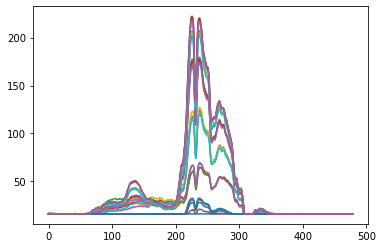

In [221]:
for i in range(5):
    plt.plot(Spec0[i,:])
    plt.plot(Spec1[i,:])
    plt.plot(Spec2[i,:])
    plt.plot(Spec3[i,:])
    plt.plot(Spec4[i,:])


In [222]:
Spec0.shape
np.mean(Spec0, axis=0).shape

(480,)

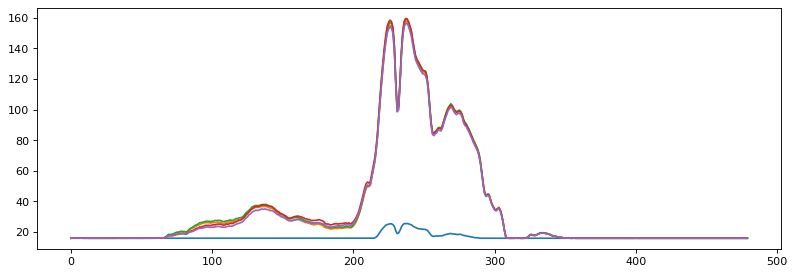

In [223]:
fig=plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(np.mean(Spec0, axis=0))
plt.plot(np.mean(Spec1, axis=0))
plt.plot(np.mean(Spec2, axis=0))
plt.plot(np.mean(Spec3, axis=0))
plt.plot(np.mean(Spec4, axis=0))

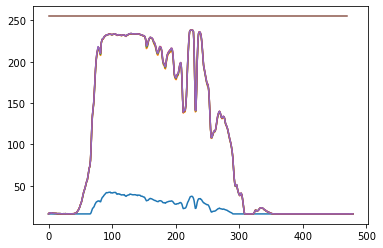

In [237]:
plt.plot(Gray0)
plt.plot(Gray1)
plt.plot(Gray2)
plt.plot(Gray3)
plt.plot(Gray4)
plt.plot([0,470],[255,255])
#plt.plot(csvGray)

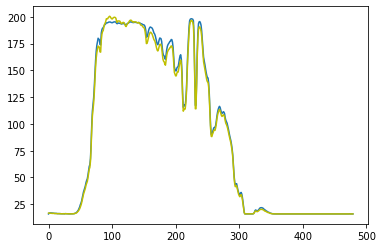

In [241]:
plt.plot((Gray0+Gray1+Gray2+Gray3+Gray4)/5)
plt.plot(csvGray, 'y')

In [165]:
s = (np.mean(Spec0, axis=0) +np.mean(Spec1, axis=0) +np.mean(Spec2, axis=0) +np.mean(Spec3, axis=0) +np.mean(Spec4, axis=0))/5

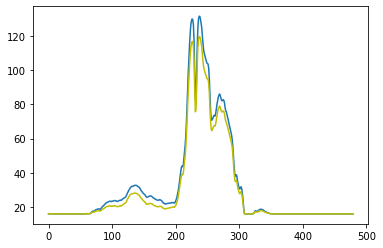

In [231]:
plt.plot(s)
plt.plot(csvLEAF, c = 'y')

In [273]:
DATA = np.zeros((obj.numShots, 5, 10, 480))
for i in range(obj.numShots):
    fpart =obj.dirName + '/raw_BMPs/' + obj.meta[i].id + '_'
    print(fpart)
    for ii in range(5):
        try:
            fname = fpart + str(ii) + '.bmp'
            im = Image.open(fname)
            print(fname)
            file1 = np.array(im)
            
            file0 = np.flip(file1, 1)
            Spec0 = dataFromBMP5(file0, zones5)
            Gray0= dataFromWhite(file0, [336, 365])
            DATA[i,ii,0:5,:] = Spec0
            DATA[i,ii,5,:] = Gray0 / grayMultiplier
            lasts = Spec0
            lastg = Gray0
            
        except:
            DATA[i,ii,0:5,:]  = lasts
            DATA[i,ii,5,:] = lastg
            pass
        

C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131050_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131052_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131052_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131052_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131052_2.

asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131212_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131212_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131214_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131217_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191

C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131259_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131259_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131259_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131305_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_B

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131347_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131350_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131350_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131350_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131350_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131350_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131352_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131352_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131352_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/2

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131443_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131443_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131443_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131445_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_A

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131530_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131530_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131530_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131533_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_A

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131621_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131623_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131626_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131626_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/2

asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131721_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131723_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131723_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131723_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131723_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131723_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131726_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131726_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131726_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191

asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131826_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131829_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131829_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131829_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_1

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131917_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131917_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131922_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_131924_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/2

C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132037_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132037_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132039_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132039_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132039_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132039_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132039_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132042_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132042_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_1320

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132145_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132145_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132150_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132150_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132150_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132150_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132150_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132152_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132152_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_B

asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132308_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132308_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_3.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132310_4.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132316_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/2

asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132436_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132436_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132441_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132441_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132441_1.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132441_2.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132441_3.bmp
asd
asd
asd
shit
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132446_
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/20191221_132446_0.bmp
asd
asd
asd
C:/Users/Garid/Documents/gimbalSoft/19_1221_newer/13h_ARRgood/raw_BMPs/

In [201]:
np.save("era" ,DATA[i,ii,0:5,:],)

In [200]:
DATA[3,3,0,:]

array([ 16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.  

In [243]:
wave = np.arange(240.2, 240.2 +2.2 *480,2.2)

In [258]:
redINdex = np.where(abs(wave-655)<=15)
nirINdex = np.where(abs(wave-865)<=15)

In [263]:
grayCSV = pd.read_csv('gray.csv', header = None)


In [271]:
grayMultiplier = np.array(grayCSV[1])

In [272]:
grayMultiplier

array([0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709,
       0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709,
       0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709,
       0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709,
       0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709,
       0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7709, 0.7708,
       0.7688, 0.7665, 0.764 , 0.7601, 0.7552, 0.7493, 0.7424, 0.7348,
       0.7261, 0.7162, 0.7056, 0.6944, 0.6829, 0.6712, 0.6595, 0.6479,
       0.6367, 0.6267, 0.6179, 0.6098, 0.603 , 0.5975, 0.5923, 0.5867,
       0.5812, 0.576 , 0.571 , 0.5661, 0.5614, 0.5569, 0.5526, 0.5479,
       0.5428, 0.5377, 0.5328, 0.5281, 0.5238, 0.5201, 0.5169, 0.5138,
       0.5109, 0.5083, 0.5055, 0.5028, 0.5002, 0.4979, 0.4958, 0.4941,
       0.4927, 0.4916, 0.4904, 0.4892, 0.4882, 0.487 , 0.4858, 0.4845,
       0.4834, 0.4824, 0.4812, 0.4802, 0.4792, 0.4781, 0.4768, 0.4754,
      

In [279]:
np.zeros((obj.numShots, 5, 10, 480))
NDVI = np.zeros((obj.numShots, 5))


In [281]:
def NDVIcalc(aspectrum):
    nir = np.mean(aspectrum[nirINdex])
    red = np.mean(aspectrum[redINdex])
    return (nir-red) / (nir+red)
for i in range(obj.numShots):
    ave5arespectrum0    = DATA[i, 0, 0, :] + DATA[i, 1, 0, :] +DATA[i, 2, 0, :] +DATA[i, 3, 0, :] + DATA[i, 4, 0, :]
    ave5arespectrum1    = DATA[i, 0, 1, :] + DATA[i, 1, 1, :] +DATA[i, 2, 1, :] +DATA[i, 3, 1, :] + DATA[i, 4, 1, :]
    ave5arespectrum2    = DATA[i, 0, 2, :] + DATA[i, 1, 2, :] +DATA[i, 2, 2, :] +DATA[i, 3, 2, :] + DATA[i, 4, 2, :]
    ave5arespectrum3    = DATA[i, 0, 3, :] + DATA[i, 1, 3, :] +DATA[i, 2, 3, :] +DATA[i, 3, 3, :] + DATA[i, 4, 3, :]
    ave5arespectrum4    = DATA[i, 0, 4, :] + DATA[i, 1, 4, :] +DATA[i, 2, 4, :] +DATA[i, 3, 4, :] + DATA[i, 4, 4, :]
    ave5arespectrumGray = DATA[i, 0, 5, :] + DATA[i, 1, 5, :] +DATA[i, 2, 5, :] +DATA[i, 3, 5, :] + DATA[i, 4, 5, :]
    
    ave5arespectrum0/=ave5arespectrumGray
    ave5arespectrum1/=ave5arespectrumGray
    ave5arespectrum2/=ave5arespectrumGray
    ave5arespectrum3/=ave5arespectrumGray
    ave5arespectrum4/=ave5arespectrumGray
    
    NDVI[i, 0] = NDVIcalc(ave5arespectrum0)
    NDVI[i, 1] = NDVIcalc(ave5arespectrum1)
    NDVI[i, 2] = NDVIcalc(ave5arespectrum2)
    NDVI[i, 3] = NDVIcalc(ave5arespectrum3)
    NDVI[i, 4] = NDVIcalc(ave5arespectrum4)

In [284]:
np.save("ndvi5", NDVI)

In [314]:

ind = [122, 142, 187]



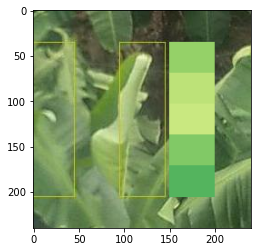

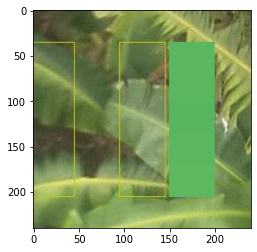

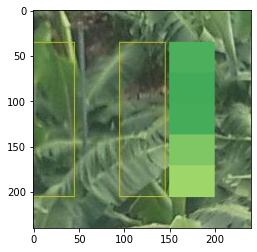

In [315]:
for i in ind:
    asdf = np.array(Image.open(obj.meta[i].crop_img_dir))
    for j in range(5):
        v = NDVI[i, j]
        asdf[35+34*j:70+34*j, 150:200, :] = [255*plt.cm.RdYlGn(v)[0], 255*plt.cm.RdYlGn(v)[1], 255*plt.cm.RdYlGn(v)[2]]
    plt.imshow(asdf)
    plt.show()

In [296]:
for i in ind:
    print(NDVI[i, :])

[0.88222308 0.87626143 0.87401471 0.87457598 0.86876072]
[0.8273585  0.83820034 0.84702058 0.83984446 0.82871166]
[0.73195903 0.80742957 0.86221746 0.87503711 0.87124892]
[0.72498458 0.68546029 0.58575251 0.4884861  0.48758651]
[0.73011078 0.72575892 0.78697789 0.84275688 0.8448255 ]
[0.81165339 0.81475256 0.80831979 0.81346759 0.82209102]


In [297]:
plt.cm.RdYlGn(0)

(0.6470588235294118, 0.0, 0.14901960784313725, 1.0)

In [301]:
170/5

34.0